## **Q1 Objective (A)** 

    i. Apply the random walk Metropolis algorithm using N = 10000 and s = 1 
    ii. Use the generated samples (x1, . . . xN ) to construct a histogram and a kernel density plot in the same figure 
    iii. Overlay a graph of f (x) on this figure to visualise the quality of these estimates 
    iv. Report the sample mean and standard deviation of the generated samples (Note: these are also known as the Monte Carlo estimates of the mean and standard deviation respectively).

Practical tip: To avoid numerical errors, it is better to use the equivalent criterion log u < log r (x∗, xi−1) = log f (x∗) − log f (xi−1) instead of u < r (x∗, xi−1).

# Method
I created these 3 functions in both python and R to generate our proposed distribution
```
f(x)

log_f(x)

random_walk_metropolis(N, s, x0)
```

/Users/nikolaijaniszewsky/anaconda3/envs/submission_final/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nikolaijaniszewsky/anaconda3/envs/submission_final/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


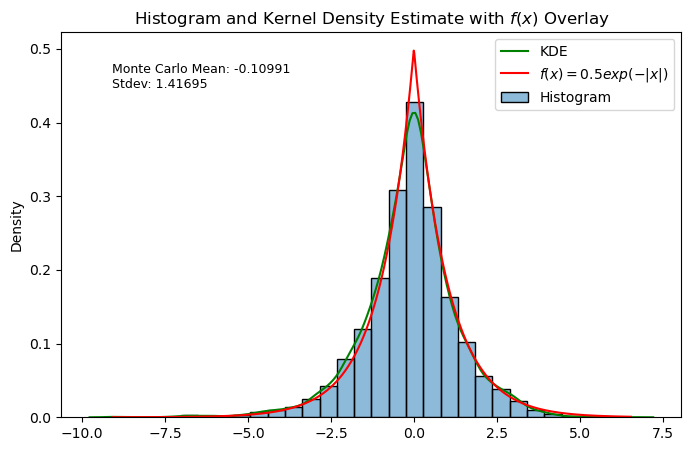

In [ ]:
import numpy as np
from scipy.stats import uniform, norm # scipy.stats is a submodule of a module called scipy...
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Step 1 - Created these 3 functions in both python and R to generate our proposal distribution
# Target distribution PDF
def f(x):
    return 0.5 * np.exp(-np.abs(x))
# Log of the target distribution for numerical stability
def log_f(x):
    return np.log(0.5) - np.abs(x)

#Step 2 - Use Random Walk Metropolis Algo
# Random walk Metropolis algorithm
def random_walk_metropolis(N, s, x0):
    samples = np.zeros(N) #generates a sample
    samples[0] = x0  # initial value of my sample

    for i in range(1, N):
        x_star = norm.rvs(loc=samples[i-1], scale=s)  #propose a new step, by drawing a random variate from a normal distribution with location (mean) set to prev step, and scale set to our standard deviation that we set...
        log_r = log_f(x_star) - log_f(samples[i-1])  # compute log of ratio
        log_u = np.log(uniform.rvs())  #we generate a random variate from a uniform distribution (pdf with all values equally likely - a straight line), and take the log. 

        if log_u < log_r:
            samples[i] = x_star  # accept the new state
        else:
            samples[i] = samples[i-1]  # reject the new state

    return samples

#Step 3 - Generate Samples and Visualise
# Initial conditions stored as variables
N = 10000
s = 1 #If s is too small then it will lead to shallow exploration (high autocorrelation), and too large it will lead to a high rejection rate. We set s such that we balance acceptance and exploration.
x0 = 0

# Generate samples
samples = random_walk_metropolis(N, s, x0)

# Calculate the sample monte carlo mean and standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples)

# Visualization: Histogram and Kernel Density Estimate (KDE) with the Actual Distribution Overlay
#What is a KDE: A technique used in statistics to create a smooth curve given a set of data. In the simplest terms, a KDE can be thought of as a smoothed version of a histogram, describing the distribution of a random variable. Its params are smoothness, kernel and bandwidth...
plt.figure(figsize=(8, 5))
sns.histplot(samples, stat='density', bins=30, alpha=0.5, label='Histogram') #Use the generated samples $(x1, . . . xN )$ to construct a histogram 
# Add KDE plot separately with specified color
sns.kdeplot(samples, color='green', label='KDE') #construcing a kernel density plot in the same figure. Hist + KDE provide estimates of f(x)
x_vals = np.linspace(min(samples), max(samples), 1000) #generates an array (x and y coordinates) of 1000 evenly spaced points between the min and max of the samples array
plt.plot(x_vals, f(x_vals), 'r-', label='$f(x) = 0.5exp(-|x|)$') #Overlay a graph of $f(x)$ on this figure to visualise the quality of the estimates.
offset = 0.05
y_position = max(f(x_vals)) - offset
plt.text(x_vals[0], y_position, f'Monte Carlo Mean: {sample_mean:.5f}\nStdev: {sample_std:.5f}', fontsize=9)
plt.title('Histogram and Kernel Density Estimate with $f(x)$ Overlay')
plt.legend()

#Exporting the Image
if not os.path.exists('./py_images'):
    os.mkdirs('./py_images')
plt.savefig('./py_images/1A_python.png')
plt.show()


#### Dissecting our function of random_walk_metropolis()

# 1. Generate a candidate for state change 
$x_{\ast}$

```
for i in range(1, N):

x_star = norm.rvs(loc=samples[i-1], scale=s)
```

* Here we simulate a random number from the normal distribution with mean (loc) equal to prev step ( $x_{i}$ )and standard deviation s.

# 2. Compute acceptance ratio of a move:

* We have an acceptance criterion $u < r(x_{\ast},x_{i-1})$ 
* Expressing the acceptance criterion in log terms makes our analysis more numerically stable $log_{u} < log_{r} (x_{\ast}, x_{i−1})$ , where $log_{r} (x_{\ast}, x_{i−1})$ = $log f(x_{\ast}) − log f(x_{i−1})$

```
for i in range(1, N):

log_r = log_f(x_star) - log_f(samples[i-1])
```

# 3. u is a uniformly distributed random number between 0 and 1 (and it is randomly drawn)

```
log_u = np.log(uniform.rvs())
```

# 4. We accept a move to the proposed step (and so set $x_{i} = x_{\ast}$ ) if $log_{u} < log_{r}(x_{\ast}, x_{i−1})$ and "stay" on current value (by setting $x_{i} = x_{i-1}$ where $x_{i-1}$ is the previous step) if $log_{u} > log_{r} (x_{\ast}, x_{i−1})$

```
if log_u < log_r:

samples[i] = x_star  # accept the new state

else:

samples[i] = samples[i-1]  # reject the new state
```